# Lab Session 07

## Q1.

Implement all the discussed examples. Attach the code and outputs below.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

## The MNIST Dataset

- MNIST stands for Modified National Institute of Standards and Technology.
- MNIST is a subset of a larger set available from NIST
- Original source: http://yann.lecun.com/exdb/mnist/
- This original dataset is also available at https://openml.org/ as MNIST_784.
- 784 = 28 x 28, means that the size of digit images is 28 x 28.
- OpenML is an open platform for sharing datasets, algorithms, and experiments.


- MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.
- Each image is labeled with the digit it represents.


- Dataset size: 70,000 examples, divided into train and test sets
- Train set size: 60,000 examples
- Test set size: 10,000 examples


- Downloaded as four files: training set images, training set labels, test set images, test set labels

## Loading Dataset

In [2]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1)
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data() #automatically divides in train and test sets

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_X.shape

(60000, 28, 28)

In [6]:
train_y.shape

(60000,)

In [7]:
test_X.shape

(10000, 28, 28)

In [8]:
test_y.shape

(10000,)

## Reshaping train and test sets into 2D arrays

In [9]:
# Reshaping 3D dataset into 2D
train_X2=train_X.reshape(60000,784)
test_X2=test_X.reshape(10000,784)

In [10]:
train_X2.shape

(60000, 784)

In [11]:
train_X2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
test_X2.shape

(10000, 784)

## Displaying an image

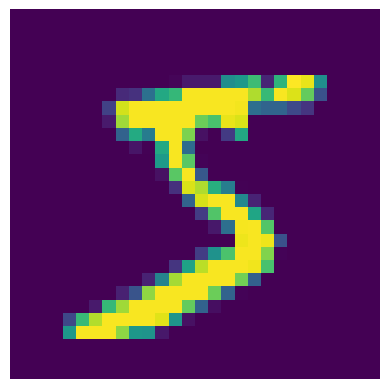

In [13]:
some_digit = train_X[0]
plt.imshow(some_digit.reshape(28, 28))
#plt.imshow(some_digit.reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

In [14]:
# Displaying corresponding output
train_y[0]

np.uint8(5)

## Model 1: Running KNN on multiclass output

In [15]:
%%time
# Running KNN
m1 = KNeighborsClassifier().fit(train_X2,train_y)

CPU times: user 7.18 ms, sys: 0 ns, total: 7.18 ms
Wall time: 9.63 ms


In [16]:
# Making predictions on test set
m1_pred = m1.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(test_y,m1_pred)*100)+"%")
m1_cmatrix=confusion_matrix(test_y, m1_pred)
print(m1_cmatrix)

The accuracy is 96.88%
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [ ]:
# Making prediction on a single image
predicted=m1.predict(test_X2[0].reshape(-1, 784))
predicted

array([7], dtype=uint8)

In [ ]:
# Actual output
test_y[0]

7

## Model 2: Running logistic regression on multiclass output

In [ ]:
%%time
# Running logistic regression
m2 = LogisticRegression(max_iter=10000).fit(train_X2, train_y)

Wall time: 35min 36s


C:\Users\maria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Making predictions on test set
m2_pred = m2.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(test_y,m2_pred)*100)+"%")
m2_cmatrix=confusion_matrix(test_y, m2_pred)
print(m2_cmatrix)

The accuracy is 92.07%
[[ 952    0    5    2    1    8    5    4    3    0]
 [   0 1111    8    3    0    1    3    2    7    0]
 [  13   15  909   19   10    5   11    7   39    4]
 [   4    1   22  919    2   20    1   12   22    7]
 [   3    4    8    5  908    1   10    6    7   30]
 [  11    3    3   35   10  772   15    6   32    5]
 [  10    5   11    3    6   16  906    0    1    0]
 [   2   10   24    6    7    2    0  943    5   29]
 [   8   15    4   21    6   26    8   10  862   14]
 [   6    7    2    9   19    8    1   22   10  925]]


## Creating two labels (outputs) on same data
- Label 1: For large numbers greater than 7
- Label 2: For odd numbers

In [ ]:
# Creating two labels for train data
train_y_large = np.array(train_y >= 7)
train_y_odd = np.array(train_y % 2 == 1)

# Putting both train labels in a single DataFrame
multilabel_train_y = pd.DataFrame(data=train_y_large, columns=['large'])
multilabel_train_y['odd'] = train_y_odd
multilabel_train_y

,large,odd
0,False,True
1,False,False
2,False,False
3,False,True
4,True,True
...,...,...
59995,True,False
59996,False,True
59997,False,True
59998,False,False


In [ ]:
#Creating two labels for test data
test_y_large = np.array(test_y >= 7)
test_y_odd = np.array(test_y % 2 == 1)

# Putting both test labels in a single DataFrame
multilabel_test_y = pd.DataFrame(data=test_y_large, columns=['large'])
multilabel_test_y['odd'] = test_y_odd
multilabel_test_y

,large,odd
0,True,True
1,False,False
2,False,True
3,False,False
4,False,False
...,...,...
9995,False,False
9996,False,True
9997,False,False
9998,False,True


## Model 3: Running K-Nearest Neighbours on multiclass output

In [ ]:
%%time
#Running K-Nearest Neighbours on train data and testing on test data
m3 = KNeighborsClassifier().fit(train_X2, multilabel_train_y)
m3_pred = pd.DataFrame(m3.predict(test_X2),columns=['large','odd'])

Wall time: 19.9 s


In [ ]:
#c_matrix for 'large'
m3_cmatrix_large=confusion_matrix(multilabel_test_y['large'], m3_pred['large'])
print(m3_cmatrix_large)

[[6917   72]
 [ 106 2905]]


In [ ]:
#c_matrix for 'odd'
m3_cmatrix_odd=confusion_matrix(multilabel_test_y['odd'], m3_pred['odd'])
print(m3_cmatrix_odd)

[[4825  101]
 [  47 5027]]


## Model 4: Running Logistic Regression on multiclass output
- Unlike K-Nearest Neighbours, logistic regression doesnot support multioutput classification directly.
- We will have to run it separately on each output.

In [ ]:
# Creating logistic regression object
m4 = LogisticRegression(random_state=0, max_iter=10000)

In [ ]:
%%time
# Running and testing on output 'large'
m4_large=m4.fit(train_X2, multilabel_train_y['large'])
m4_large_pred = m4_large.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y['large'],m4_large_pred)*100)+"%")
m4_large_cmatrix=confusion_matrix(multilabel_test_y['large'],m4_large_pred)
print(m4_large_cmatrix)

The accuracy is 91.77%
[[6638  351]
 [ 472 2539]]
Wall time: 8min 17s


In [ ]:
%%time
# Running and testing on output 'odd'
m4_odd=m4.fit(train_X2, multilabel_train_y['odd'])
m4_odd_pred = m4_odd.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y['odd'],m4_odd_pred)*100)+"%")
m4_odd_cmatrix=confusion_matrix(multilabel_test_y['odd'],m4_odd_pred)
print(m4_odd_cmatrix)

The accuracy is 90.16%
[[4440  486]
 [ 498 4576]]
Wall time: 7min 10s


## Q2.

Create a multilabel array containing three target labels for each digit image of MNIST dataset: the
first indicates whether or not the digit is small (<5), the second indicates whether or not it is even,
and the third indicates whether or not it is prime. Train a KNeighborsClassifier using the multiple
targets array. Analyze the accuracy and F1 score on all instances of test dataset.

In [23]:
# Creating two labels for train data
train_y_small = np.array(train_y < 5)
train_y_even = np.array(train_y % 2 == 0)
train_y_prime = np.array(np.isin(train_y, [2,3,5,7]))

# Putting both train labels in a single DataFrame
multilabel_train_y1 = pd.DataFrame(data=train_y_small, columns=['small'])
multilabel_train_y1['even'] = train_y_even
multilabel_train_y1['prime'] = train_y_prime
multilabel_train_y1

,small,even,prime
0,False,False,True
1,True,True,False
2,True,True,False
3,True,False,False
4,False,False,False
...,...,...,...
59995,False,True,False
59996,True,False,True
59997,False,False,True
59998,False,True,False


In [25]:
# Creating two labels for train data
test_y_small = np.array(test_y < 5)
test_y_even = np.array(test_y % 2 == 0)
test_y_prime = np.array(np.isin(test_y, [2,3,5,7]))

# Putting both train labels in a single DataFrame
multilabel_test_y1 = pd.DataFrame(data=test_y_small, columns=['small'])
multilabel_test_y1['even'] = test_y_even
multilabel_test_y1['prime'] = test_y_prime
multilabel_test_y1

,small,even,prime
0,False,False,True
1,True,True,True
2,True,False,False
3,True,True,False
4,True,True,False
...,...,...,...
9995,True,True,True
9996,True,False,True
9997,True,True,False
9998,False,False,True


In [24]:
%%time
#Running K-Nearest Neighbours on train data and testing on test data
mQ1 = KNeighborsClassifier().fit(train_X2, multilabel_train_y1)
mQ1_pred = pd.DataFrame(mQ1.predict(test_X2),columns=['small', 'even', 'prime'])

CPU times: user 1min 3s, sys: 3.62 s, total: 1min 7s
Wall time: 1min 2s


In [29]:
%%time
# Running and testing on output 'odd'
mQ1_even=mQ1.fit(train_X2, multilabel_train_y1['even'])
mQ1_even_pred = mQ1_even.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y1['even'],mQ1_even_pred)*100)+"%")
mQ1_even_cmatrix=confusion_matrix(multilabel_test_y1['even'],mQ1_even_pred)
print(mQ1_even_cmatrix)

The accuracy is 98.52%
[[5027   47]
 [ 101 4825]]
CPU times: user 1min 3s, sys: 3.35 s, total: 1min 6s
Wall time: 49.1 s


In [33]:
print("The f1-score is "+str(metrics.f1_score(multilabel_test_y1['even'],mQ1_even_pred)*100)+"%")

The f1-score is 98.48948765054092%


In [30]:
%%time
# Running and testing on output 'odd'
mQ1_prime=mQ1.fit(train_X2, multilabel_train_y1['prime'])
mQ1_prime_pred = mQ1_prime.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y1['prime'],mQ1_prime_pred)*100)+"%")
mQ1_prime_cmatrix=confusion_matrix(multilabel_test_y1['prime'],mQ1_prime_pred)
print(mQ1_prime_cmatrix)

The accuracy is 98.44000000000001%
[[5976   62]
 [  94 3868]]
CPU times: user 1min 2s, sys: 3.12 s, total: 1min 5s
Wall time: 50.3 s


In [34]:
print("The f1-score is "+str(metrics.f1_score(multilabel_test_y1['prime'],mQ1_prime_pred)*100)+"%")

The f1-score is 98.02331474911303%


In [31]:
%%time
# Running and testing on output 'odd'
mQ1_small=mQ1.fit(train_X2, multilabel_train_y1['small'])
mQ1_small_pred = mQ1_small.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y1['small'],mQ1_small_pred)*100)+"%")
mQ1_small_cmatrix=confusion_matrix(multilabel_test_y1['small'],mQ1_small_pred)
print(mQ1_small_cmatrix)

The accuracy is 98.04%
[[4754  107]
 [  89 5050]]
CPU times: user 1min 1s, sys: 3 s, total: 1min 4s
Wall time: 55.6 s


In [37]:
print("The f1-score is "+str(metrics.f1_score(multilabel_test_y1['small'],mQ1_small_pred)*100)+"%")

The f1-score is 98.0963480963481%


## Q3.

Build a multioutput classification system by creating the training and test sets using the MNIST
images and adding noise to their pixel intensities. Train the classifier and clean all the images of
test dataset. Write the code and attach printout of cleaned images.

In [41]:
noise = np.random.randint(0, 100, (len(train_X2), 784))
X_train_mod = train_X2 + noise
noise = np.random.randint(0, 100, (len(test_X2), 784))
X_test_mod = test_X2 + noise
y_train_mod = train_X2
y_test_mod = test_X2

In [46]:
import matplotlib as mpl
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = mpl.cm.binary,
  interpolation="nearest")
  plt.axis("off")


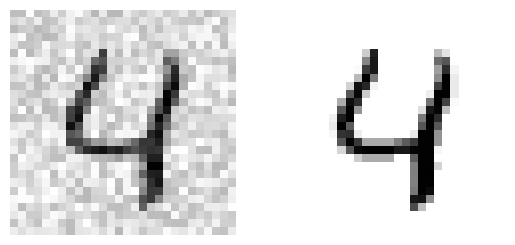

In [49]:
some_index = 4
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [52]:
mQ3 = KNeighborsClassifier()
mQ3.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

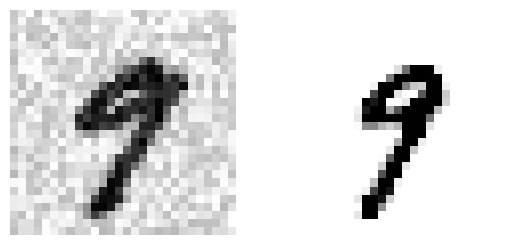

In [60]:

clean_digit = mQ3.predict([X_test_mod[20]])
plt.subplot(121); plot_digit(X_test_mod[20])
plt.subplot(122);plot_digit(clean_digit)

## Q4.

Create a multilabel array containing two target labels for each digit image of letter dataset: the first
indicates whether or not the letter is small (A to H) and the second indicates whether or not it is
vowel. Train a KNeighborsClassifier using the multiple targets array. Use train-test split of 60:40.
Analyze the accuracy and F1 score on all instances of test dataset. Hint: the dataset can be loaded
using sklearn.datasets. fetch_openml function.

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

      lettr
0         T
1         I
2         D
3         N
4         G
...     ...
19995     D
19996     C
19997     T
19998     S
19999     A

[20000 rows x 1 columns]


In [17]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, random_state=2, test_size=0.4)

In [20]:
# Creating two labels for train data
trainY_small = np.array(np.isin(trainY, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']))
trainY_vowel = np.array(np.isin(trainY, ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']))


# Putting both train labels in a single DataFrame
multilabel_trainY = pd.DataFrame(data=trainY_small, columns=['small'])
multilabel_trainY['vowel'] = trainY_vowel
multilabel_trainY

,small,vowel
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
11995,True,False
11996,True,False
11997,True,False
11998,True,False


In [21]:
# Creating two labels for train data
testY_small = np.array(np.isin(testY, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']))
testY_vowel = np.array(np.isin(testY, ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']))


# Putting both train labels in a single DataFrame
multilabel_testY = pd.DataFrame(data=testY_small, columns=['small'])
multilabel_testY['vowel'] = testY_vowel
multilabel_testY

,small,vowel
0,True,False
1,True,False
2,True,True
3,True,False
4,True,False
...,...,...
7995,True,False
7996,True,True
7997,True,False
7998,True,True


In [22]:
%%time
#Running K-Nearest Neighbours on train data and testing on test data
mQ3 = KNeighborsClassifier().fit(trainX, multilabel_trainY)
mQ3_pred = pd.DataFrame(mQ3.predict(trainX),columns=['small', 'vowel'])

CPU times: user 3.96 s, sys: 1.18 s, total: 5.14 s
Wall time: 6.18 s


In [23]:
%%time
# Running and testing on output 'odd'
mQ3_small=mQ3.fit(trainX, multilabel_trainY['small'])
mQ3_small_pred = mQ3_small.predict(testX)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_testY['small'],mQ3_small_pred)*100)+"%")
mQ3_small_cmatrix=confusion_matrix(multilabel_testY['small'],mQ3_small_pred)
print(mQ3_small_cmatrix)
print("The f1-score is "+str(metrics.f1_score(multilabel_testY['small'],mQ3_small_pred)*100)+"%")

The accuracy is 100.0%
[[8000]]
The f1-score is 100.0%
CPU times: user 2.11 s, sys: 910 ms, total: 3.02 s
Wall time: 4.35 s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [24]:
%%time
# Running and testing on output 'odd'
mQ3_vowel=mQ3.fit(trainX, multilabel_trainY['vowel'])
mQ3_vowel_pred = mQ3_vowel.predict(testX)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_testY['vowel'],mQ3_vowel_pred)*100)+"%")
mQ3_vowel_cmatrix=confusion_matrix(multilabel_testY['vowel'],mQ3_vowel_pred)
print(mQ3_vowel_cmatrix)
print("The f1-score is "+str(metrics.f1_score(multilabel_testY['vowel'],mQ3_vowel_pred)*100)+"%")

The accuracy is 98.1375%
[[6386   48]
 [ 101 1465]]
The f1-score is 95.16076648262423%
CPU times: user 2.31 s, sys: 509 ms, total: 2.82 s
Wall time: 3.49 s
